## Elementify any strings

In [3]:
elementList = [
    'H', 'D', 'T', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P',
    'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
    'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru',
    'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce',
    'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf',
    'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn',
    'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm',
    'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh',
    'Fl', 'Mc', 'Lv', 'Ts', 'Og']
elementList = [x.upper() for x in elementList]
elementSet = set(elementList)


In [192]:
import numpy as np
import itertools
# from sympy.utilities.iterables import multiset_permutations
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def permutationWithoutRepeat12(inList):
    # Currently only supports 2 kinds, 1 and 2
    len2 = len([x for x in inList if x == 2])
    lenList = len(inList)
    combination2 = list(itertools.combinations(range(lenList), len2))
    combinations = []
    for comb in combination2:
        baseArray = [1] * lenList
        for ii in comb:
            baseArray[ii] = 2
        combinations.append(baseArray)
    return combinations


def zerosAndOnes(num):
    combinations = []
    for ii in range(2**num):
        combinations.append([ii//(2**(x)) % 2 for x in range(num)])
    return combinations

def getSepWords(inString, sep):
    currIdx = 0
    sepWords = []
    for ss in sep:
        sepWords.append(inString[currIdx:currIdx+ss])
        currIdx += ss
    return sepWords

def Fibonacci(n):
    F = np.ones(n,dtype=int)
    for ii in range(2, len(F)):
        F[ii] = F[ii-1] + F[ii-2]
    return F[-1]

def elementify(inString,verbose=True,printing=False,resolution=None):
    elementWordSet = []
        
    if len(inString) == 0:
        return None
    if len(inString) > 120:
        if verbose:
            print("Procssing string with length > 25 is very slow, so skip!")
        return None
    inString = inString.upper()
    if 'J' in inString or 'Q' in inString:
        if verbose:
            print("Can't have J and Q in the string - there's no symbol with these characters")
        return None
    # First check if there are irrepairable ones
    workAlone = []
    workWithPrev = [False]
    workWithNext = []
    for idx, ii in enumerate(inString):
        workAlone.append(ii in elementSet)
        if len(inString) == 1:
            workWithNext.append(False)
        if idx < len(inString)-1:
            workWithNext.append(inString[idx:idx+2] in elementSet)
        if idx > 0:
            workWithPrev.append(inString[idx-1:idx+1] in elementSet)
        if not workWithPrev[-1] and not workWithNext[-1] and not workAlone[-1]:
            if verbose:
                print(f'{inString} cannot be elementified. Ruled out by linear filtering')
            return None
    workWithNext.append(False)
    
    # Using YJF's method
    OKarray = np.array([workAlone, workWithNext],dtype=int)
    OKarraySum = OKarray.sum(0)
    whereTwoIsPossible = np.where(OKarraySum == 2)[0]
    twos = len(whereTwoIsPossible)
    twoCombinations = 2 ** twos

    twoCombinationsSequence = zerosAndOnes(twos)
    exhaustiveCombinations = Fibonacci(len(inString)+1)
    
    if twoCombinations < exhaustiveCombinations:
        for seq in twoCombinationsSequence: 
            idxCounter = 0
            seqCounter = 0
            validDivision = False
            idxSeq = [0]
            while idxCounter <= len(inString) - 1:
                if OKarraySum[idxCounter] == 0:
                    break
                elif OKarraySum[idxCounter] == 1:
                    if OKarray[0, idxCounter] == 1:
                        idxCounter += 1
                        idxSeq.append(idxCounter)
                    elif OKarray[1, idxCounter] == 1:
                        idxCounter += 2
                        idxSeq.append(idxCounter)
                elif OKarraySum[idxCounter] == 2:
                    idxCounter += OKarray[seq[seqCounter], idxCounter]+seq[seqCounter]
                    seqCounter += 1
                    idxSeq.append(idxCounter)
                if idxCounter == len(inString):
                    validDivision = True
            if validDivision:
                sepWords = [inString[idxSeq[ii]:idxSeq[ii+1]] for ii in range(len(idxSeq)-1)]
                if sepWords not in elementWordSet:
                    elementWordSet.append(sepWords)
            else:
                pass
    else:
        numSep = len(inString)
        for ii in range(numSep//2+1):    
            sepArray = [2]*ii + [1] * (numSep - 2 * ii)
            sepSet = permutationWithoutRepeat12(sepArray)
            for sep in sepSet:
                isGoodSep = True
                sepWords = getSepWords(inString, sep)
                for word in sepWords:
                    if word not in elementSet:
                        isGoodSep = False
                        break
                if isGoodSep:
                    elementWordSet.append(sepWords)

    if verbose:
        if len(elementWordSet) > 0:
            print(f'{inString} can be elementified in {len(elementWordSet)} ways as')
            for ii in elementWordSet:
                print('  '.join(ii))
        else:
            print(f'{inString} cannot be elementified.')
            return None


    if printing:
        for word in elementWordSet:
            printWord(word,resolution=resolution)
        
    return elementWordSet

def printWord(inWordList, resolution=None):
    # Use matplotlib to print element symbols
    fig, ax = plt.subplots(figsize=(2*len(inWordList), 2), dpi=resolution)
    fig.tight_layout(rect=[0, 0.00, 1, 1])
    ax.set_xlim([0, len(inWordList)])
    ax.set_ylim([0,1])

    ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False) 
    ax.set_box_aspect(1/len(inWordList))
    for ii in range(len(inWordList)):
        rect = patches.Rectangle((ii,0), 1, 1, linewidth=1, edgecolor='k', facecolor='w')
        ax.add_patch(rect)
        plt.text(ii+0.5,0.46,inWordList[ii].capitalize(),fontdict={'family':'Serif'},fontsize=50,
                 horizontalalignment='center',verticalalignment='center')



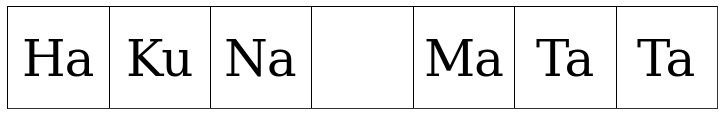

In [198]:
printWord(['Ha','Ku','Na','','Ma','Ta','Ta'])

SATURN can be elementified in 1 ways as
S  AT  U  RN


[['S', 'AT', 'U', 'RN']]

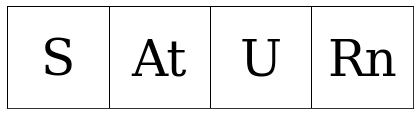

In [199]:
elementify('SATURN',printing=True)

PHAGOCYTOSIS can be elementified in 3 ways as
P  H  AG  O  C  Y  T  O  S  I  S
P  H  AG  O  C  Y  T  OS  I  S
P  H  AG  O  C  Y  T  O  SI  S


[['P', 'H', 'AG', 'O', 'C', 'Y', 'T', 'O', 'S', 'I', 'S'],
 ['P', 'H', 'AG', 'O', 'C', 'Y', 'T', 'OS', 'I', 'S'],
 ['P', 'H', 'AG', 'O', 'C', 'Y', 'T', 'O', 'SI', 'S']]

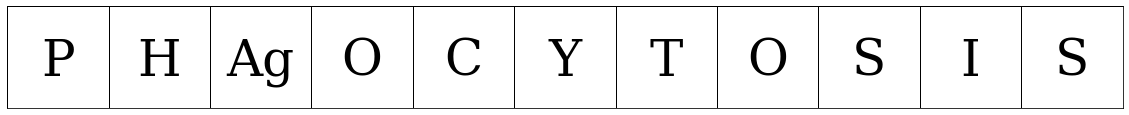

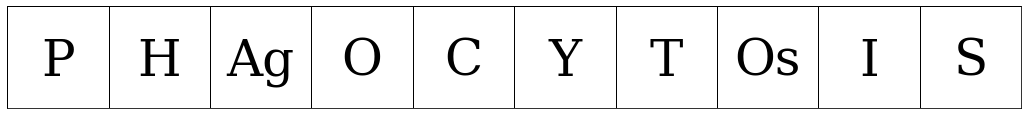

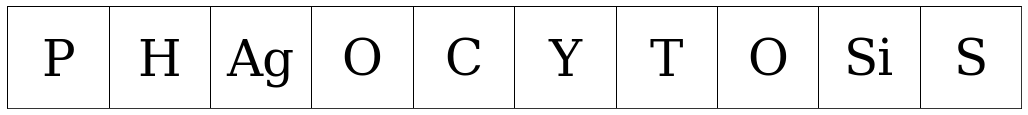

In [200]:
elementify('Phagocytosis',printing=True)

BANANAS can be elementified in 2 ways as
BA  NA  N  AS
BA  NA  NA  S


[['BA', 'NA', 'N', 'AS'], ['BA', 'NA', 'NA', 'S']]

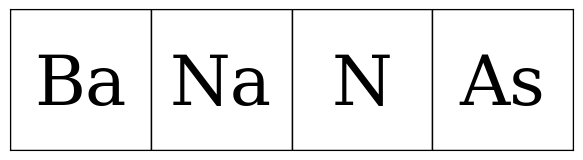

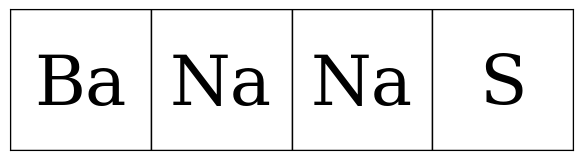

In [212]:
elementify('BANANAS',printing=True,resolution=100)

SHOWER can be elementified in 2 ways as
S  H  O  W  ER
S  HO  W  ER


[['S', 'H', 'O', 'W', 'ER'], ['S', 'HO', 'W', 'ER']]

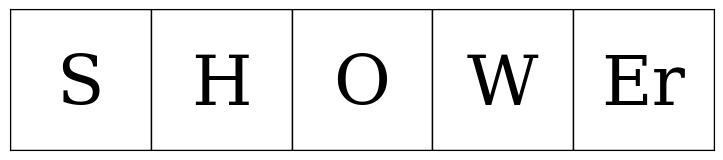

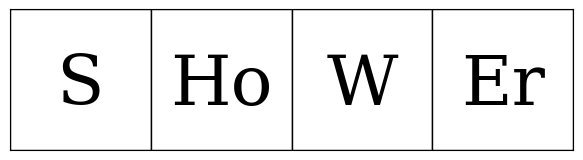

In [206]:
elementify('shower',printing=True,resolution=100)

MOOSE can be elementified in 1 ways as
MO  O  SE


[['MO', 'O', 'SE']]

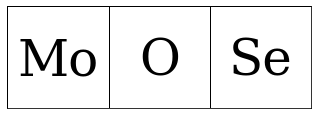

In [207]:
elementify('MOOSE',printing=True)

MONTANA can be elementified in 1 ways as
MO  N  TA  NA


[['MO', 'N', 'TA', 'NA']]

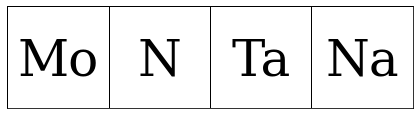

In [208]:
elementify('Montana',printing=True)

HOHOHO can be elementified in 8 ways as
H  O  H  O  H  O
HO  H  O  H  O
H  O  HO  H  O
HO  HO  H  O
H  O  H  O  HO
HO  H  O  HO
H  O  HO  HO
HO  HO  HO


[['H', 'O', 'H', 'O', 'H', 'O'],
 ['HO', 'H', 'O', 'H', 'O'],
 ['H', 'O', 'HO', 'H', 'O'],
 ['HO', 'HO', 'H', 'O'],
 ['H', 'O', 'H', 'O', 'HO'],
 ['HO', 'H', 'O', 'HO'],
 ['H', 'O', 'HO', 'HO'],
 ['HO', 'HO', 'HO']]

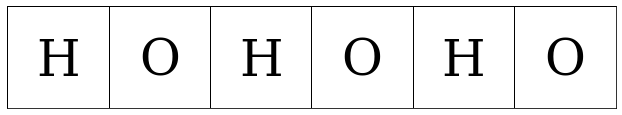

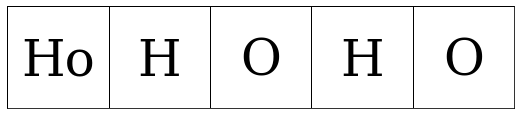

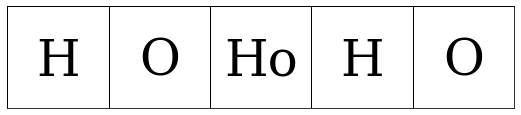

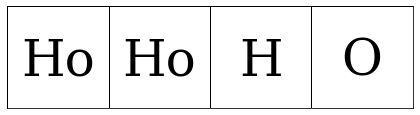

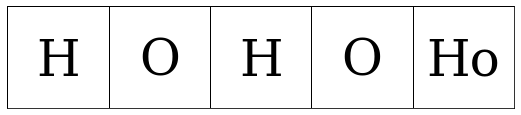

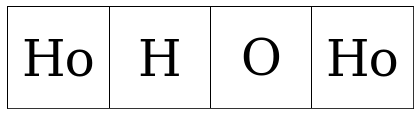

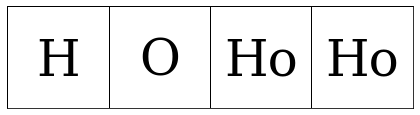

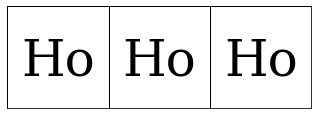

In [211]:
elementify('HOHOHO',printing=True)